# Circuit Building

This tutorial demonstrates how circuits can be built up from the set of fundamental components included within Lightworks. It aims to act as a basic reference, with a much more detailed description of each component and functionality included in the SDK Circuit section. 

In [1]:
import lightworks as lw

import matplotlib.pyplot as plt
import numpy as np

## Basic circuit

Start with a basic circuit, consisting only of beam splitters and phase shifters.

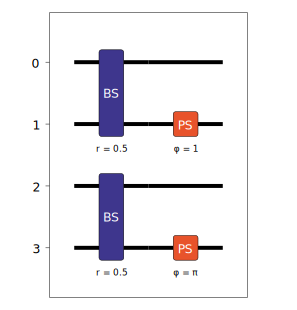

In [2]:
circuit = lw.Circuit(4)

# Beam splitters 
circuit.bs(0)
circuit.bs(2)

# Phase shifters
circuit.ps(1, 1)
circuit.ps(3, np.pi)

circuit.display()

## Mode swaps

It is also possible to use the mode swap component to quickly switch modes.

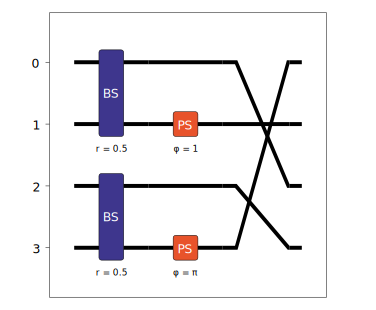

In [3]:
# Map mode 0 -> 2, 2 -> 3 & 3 -> 0

circuit.mode_swaps({0:2, 2:3, 3:0})

circuit.display()

## Loss

When simulating, loss can be introduced to each of the circuit modes, either alongside components or directly.

In [4]:
# Add loss through beam splitter
circuit.bs(1, loss = 2)

# Add directly
circuit.loss(0, 0.3)

The display_loss option is required for these to be shown.

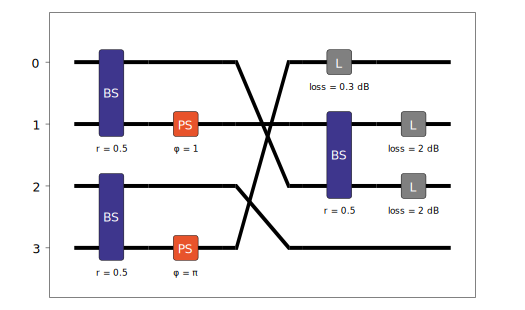

In [5]:
circuit.display(display_loss = True)

## Parameterization

Circuits can be parameterized using the included Parameter objects.

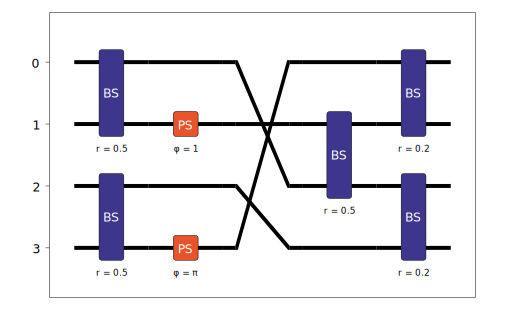

In [6]:
ref = lw.Parameter(0.2)

circuit.bs(0, reflectivity = ref)
circuit.bs(2, reflectivity = ref)

circuit.display()

This can be updated with the set method to alter the circuit without having to redefine it.

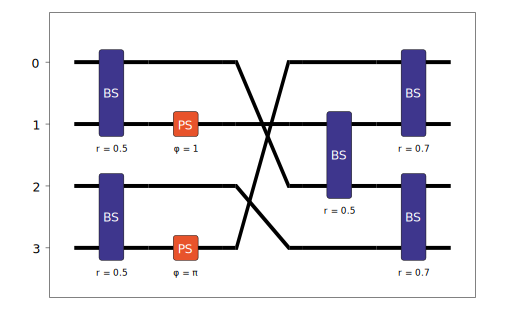

In [7]:
ref.set(0.7)

circuit.display()

## Adding circuits

It is also possible to combine circuits using either + or add. The former requires both circuits be the same size, whereas the latter does not.

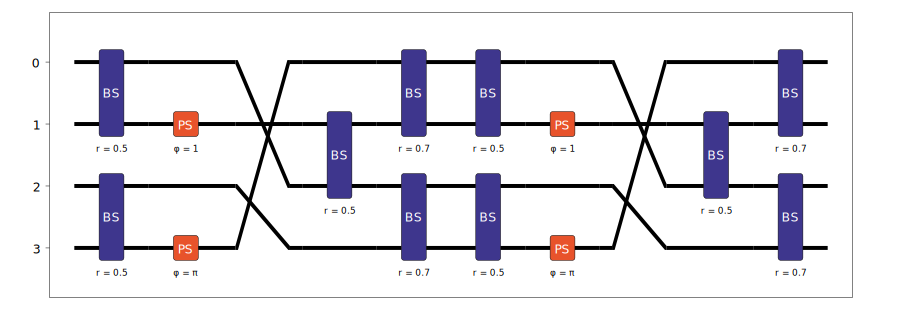

In [8]:
# Add the created circuit to itself
new_circuit =  circuit + circuit

new_circuit.display()

Sub-circuit:


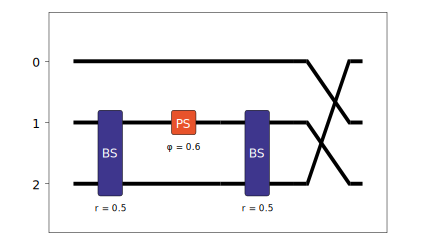

Combined circuit:


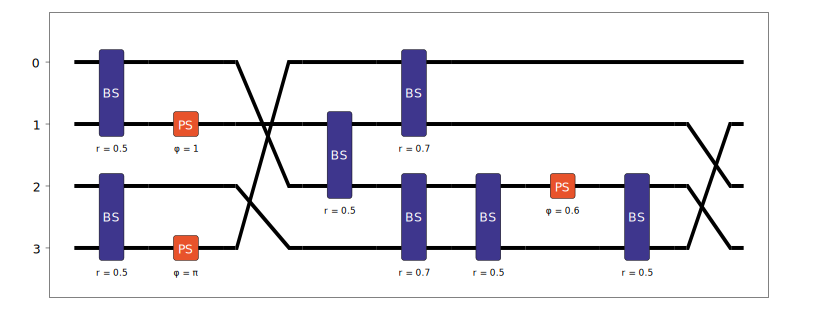

In [9]:
# Define a smaller circuit and add to mode 1 of the original circuit

circuit2 = lw.Circuit(3)
circuit2.bs(1)
circuit2.ps(1, 0.6)
circuit2.bs(1)
circuit2.mode_swaps({0:1, 1:2, 2:0})

print("Sub-circuit:")
circuit2.display()

circuit.add(circuit2, 1)

print("Combined circuit:")
circuit.display()

## Heralds
Heralds can also be included as part of the circuit, which means that these modes do not need to be specifed in the simulation objects.

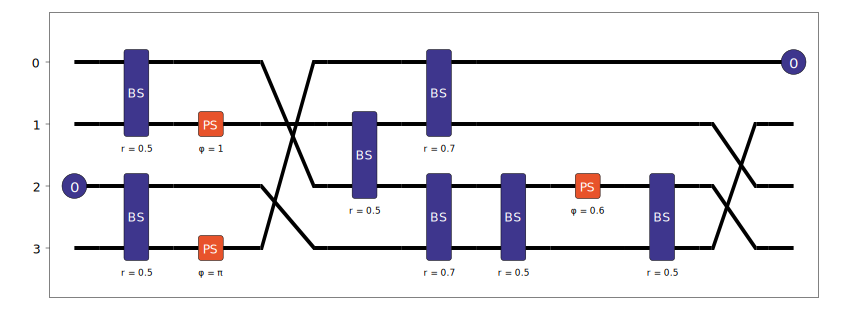

In [10]:
circuit.herald(0, 2, 0)

circuit.display()

It is also possible to add heralds to sub-circuits and then include these within a larger circuit. 

Note: heralds on the smaller circuit, will be added to new dedicated modes in the larger circuit and cannot be interacted with in any way. This can be seen from the display of the created circuit below.

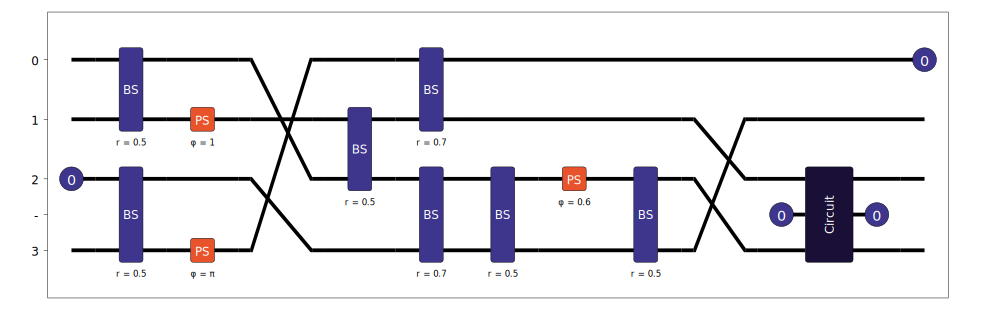

In [11]:
circuit2.herald(0, 1, 1)

circuit.add(circuit2, 2)
circuit.display()

## Unitary Matrices
Unitary transformations can also be implemented across a set of modes.
These are defined with the Unitary object and can be added to the existing circuit.
The included random_unitary function allows for a random transformation to be configured.

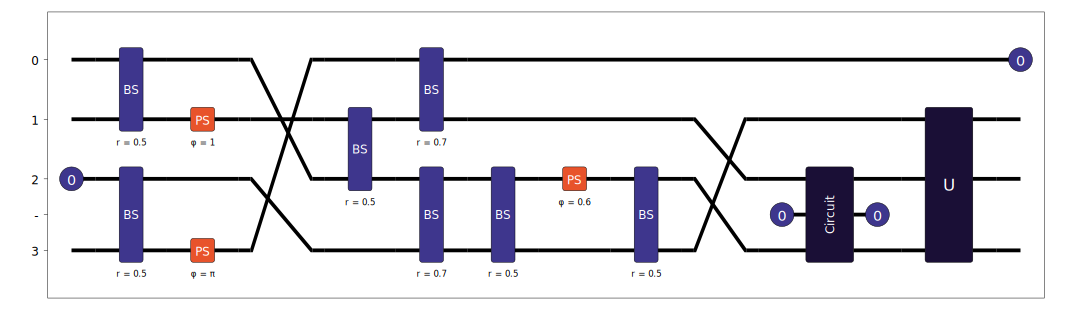

In [12]:
U = lw.random_unitary(3)
unitary = lw.Unitary(U, label = "U")

circuit.add(unitary, 1)
circuit.display()